# CSC-221 Group Project Part 2

## Author: <font color='red'> Brian J Gill </font>

In [1]:

import ssl
import urllib.request
from bs4 import BeautifulSoup

ssl._create_default_https_context = ssl._create_unverified_context

url = "https://en.wikipedia.org/wiki/McDonald%27s"

page = urllib.request.urlopen(url)

soup = BeautifulSoup(page, "lxml")

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   McDonald's - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-ma

In [2]:
all_tables = soup.find_all("table")
all_tables

[<table class="infobox vcard"><caption class="infobox-title fn org">McDonald's Corporation</caption><tbody><tr><td class="infobox-image logo" colspan="2"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:McDonald%27s_Golden_Arches.svg"><img alt="Two yellow arches joined together to form a rounded letter M." class="mw-file-element" data-file-height="239" data-file-width="273" decoding="async" height="158" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/McDonald%27s_Golden_Arches.svg/180px-McDonald%27s_Golden_Arches.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/McDonald%27s_Golden_Arches.svg/270px-McDonald%27s_Golden_Arches.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/McDonald%27s_Golden_Arches.svg/360px-McDonald%27s_Golden_Arches.svg.png 2x" width="180"/></a></span><div class="infobox-caption"><a href="/wiki/Golden_Arches" title="Golden Arches">Golden Arches</a> logo used since 2006</div></td></tr><tr><td class="i

In [3]:
right_table = soup.find('table', class_='wikitable float-left')
right_table

<table class="wikitable float-left" style="text-align: right;">
<tbody><tr>
<th>Year
</th>
<th>Revenue<br/>in billion US$
</th>
<th>Net income<br/>in billion US$
</th>
<th>Total assets<br/>in billion US$
</th>
<th>Price per share<br/>in USD$<br/><sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (November 2023)">citation needed</span></a></i>]</sup>
</th>
<th>Locations<br/><sup class="reference" id="cite_ref-136"><a href="#cite_note-136">[135]</a></sup>
</th>
<th>Employees<br/><sup class="reference" id="cite_ref-137"><a href="#cite_note-137">[136]</a></sup><sup class="reference" id="cite_ref-138"><a href="#cite_note-138">[137]</a></sup>
</th>
<th><abbr title="Reference">Ref.</abbr>
</th></tr>
<tr>
<td>2005
</td>
<td>19.1
</td>
<td>2.6
</td>
<td>29.9
</td>
<td>31.88
</td>
<td>
</td>
<td>447,000
</td>
<td><sup class="ref

In [4]:
A = []
B = []
C = []
D = []
E = []
F = []
G = []


for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 8:
        A.append(cells[0].find(string = True).strip())
        B.append(cells[1].find(string = True).strip())
        C.append(cells[2].find(string = True).strip())
        D.append(cells[3].find(string = True).strip())
        E.append(cells[4].find(string = True).strip())
        F.append(cells[5].find(string = True).strip())
        G.append(cells[6].find(string = True).strip())
        

In [5]:
import pandas as pd

df = pd.DataFrame(A, columns=['Year'])
df['Revenue in Millions'] = B
df['Net Income in Millions'] = C
df['Total Assets in Millions'] = D
df['Price per Share'] = E
df['Locations'] = F
df['Employees'] = G

# display the dataframe
df

,Year,Revenue in Millions,Net Income in Millions,Total Assets in Millions,Price per Share,Locations,Employees
0,2005,19.1,2.6,29.9,31.88,,"447,000"
1,2006,20.8,3.5,28.9,36.79,"31,046","465,000"
2,2007,22.7,2.3,29.3,50.98,31.377,"390,000"
3,2008,23.5,4.3,28.4,58.06,"31,967","400,000"
4,2009,22.7,4.5,30.2,57.44,"32,478","385,000"
5,2010,24.0,4.9,31.9,70.91,"32,737","400,000"
6,2011,27.0,5.5,32.9,83.97,"33,510","420,000"
7,2012,27.5,5.4,35.3,92.53,"34,480","440,000"
8,2013,28.1,5.5,36.6,97.26,"35,429","440,000"
9,2014,27.4,4.7,34.2,96.38,"36,258","420,000"


In [6]:
df.to_csv('McDonalds_Revenue_2005-2021.csv')

print('File McDonalds_Revenue_2005-2021.csv created.')

File McDonalds_Revenue_2005-2021.csv created.


In [7]:
import matplotlib.pyplot as plt
import numpy as np

mcd_rev_df = pd.read_csv("McDonalds_Revenue_2005-2021.csv")

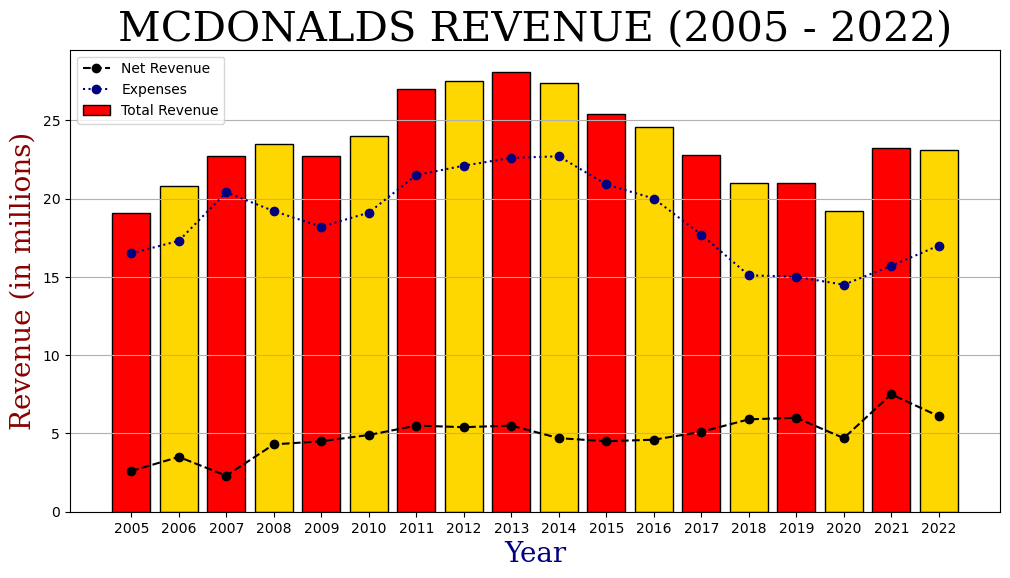

In [8]:
plt.figure(figsize=(12,6))

YEARS = np.array(mcd_rev_df['Year'].values)
REV = np.array(mcd_rev_df['Revenue in Millions'].values)
NET = np.array(mcd_rev_df['Net Income in Millions'].values)
EXPENSES = REV - NET

plt.bar(YEARS, REV, color=['red', 'gold'], edgecolor='black', label='Total Revenue')
plt.plot(YEARS, NET, marker='o', linestyle='--', color='black', label='Net Revenue')
plt.plot(YEARS, EXPENSES, marker='o', linestyle=':', color='navy', label='Expenses')

font1 = {'family':'serif', 'color':'black', 'size':30}
font2 = {'family':'serif', 'color':'navy', 'size':20}
font3 = {'family':'serif', 'color':'darkred', 'size':20}

plt.title("MCDONALDS REVENUE (2005 - 2022)", fontdict=font1)

plt.xlabel('Year', fontdict=font2)
plt.xticks(YEARS)

plt.ylabel('Revenue (in millions)', fontdict=font3)

plt.grid(axis='y')
plt.legend(loc='upper left')

plt.show()

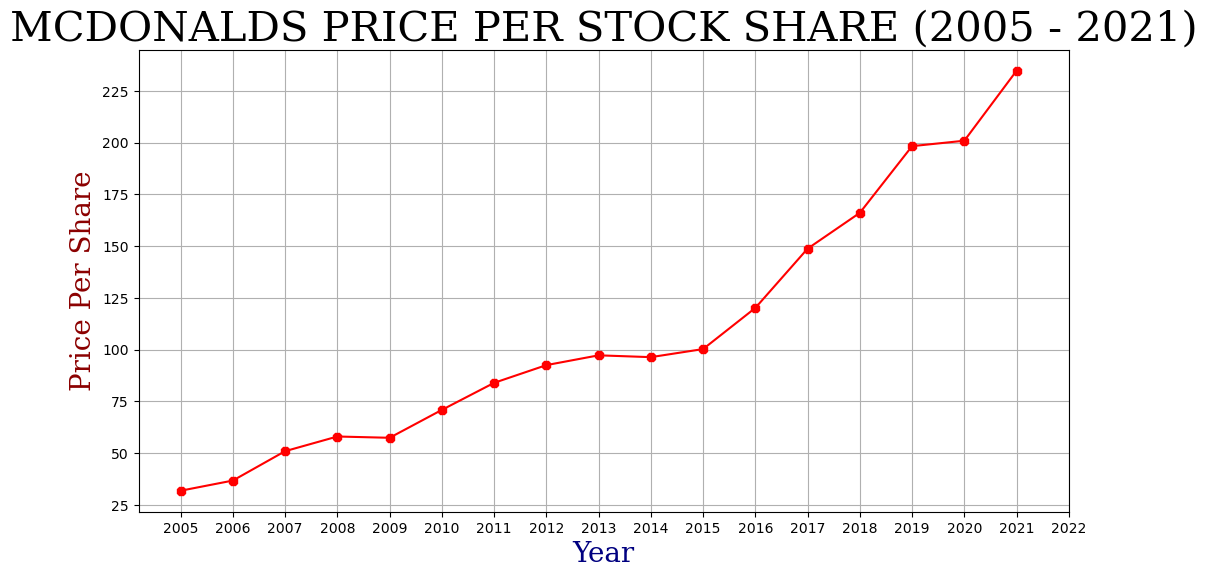

In [9]:
plt.figure(figsize=(12,6))

PPS = np.array(mcd_rev_df['Price per Share'].values)

plt.plot(YEARS, PPS, marker='8', linestyle='-', color='red')

plt.title("MCDONALDS PRICE PER STOCK SHARE (2005 - 2021)", fontdict=font1)

plt.xlabel('Year', fontdict=font2)
plt.xticks(YEARS)

plt.ylabel('Price Per Share', fontdict=font3)

plt.grid()

plt.show()